# Day 3 :-
In this project we will solve classification problem where in we have a dataset in whihc there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os

In [10]:
os.chdir("/content/drive/MyDrive/Deep Learning Projects/Churn Project")

### **CUSTOMER CHURN PREDICTION USING ANN**
In this project we will solve classification problem where in we have a dataset in whihc there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

#### **Importing Libraries**

In [11]:
! pip install tensorflow

In [12]:
import numpy as np  # Linear algebra
import pandas as pd  # data preprocessing, csv file 1/0 (e.g. pd.read_csv)

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

import seaborn as sns
%matplotlib inline

#for Interactive shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [13]:
print(tensorflow)

<module 'tensorflow' from '/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py'>


In [14]:
from tensorflow.keras.models import Sequential

In [15]:
print(tensorflow.__version__)

2.18.0


In [16]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learning Projects/Churn Project/Churn_Modelling.csv", index_col="RowNumber")

In [17]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# Some columns are totally unproductivr so let's reomove them
df.drop(["CustomerId","Surname"],axis=1, inplace = True)

In [21]:
df = pd.get_dummies(prefix = "Geo", data = df, columns = ["Geography"])

In [22]:
df.shape

(10000, 13)

In [23]:
df = df.replace({"Female":1,"Male":0})

/tmp/ipython-input-23-1666145824.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Female":1,"Male":0})


In [24]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [25]:
df.shape

(10000, 13)

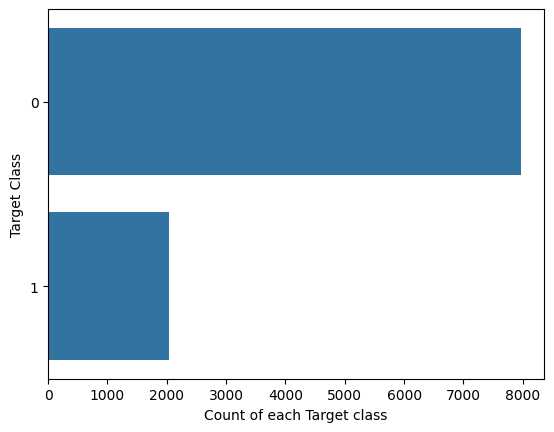

In [26]:
sns.countplot(y= df.Exited , data = df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

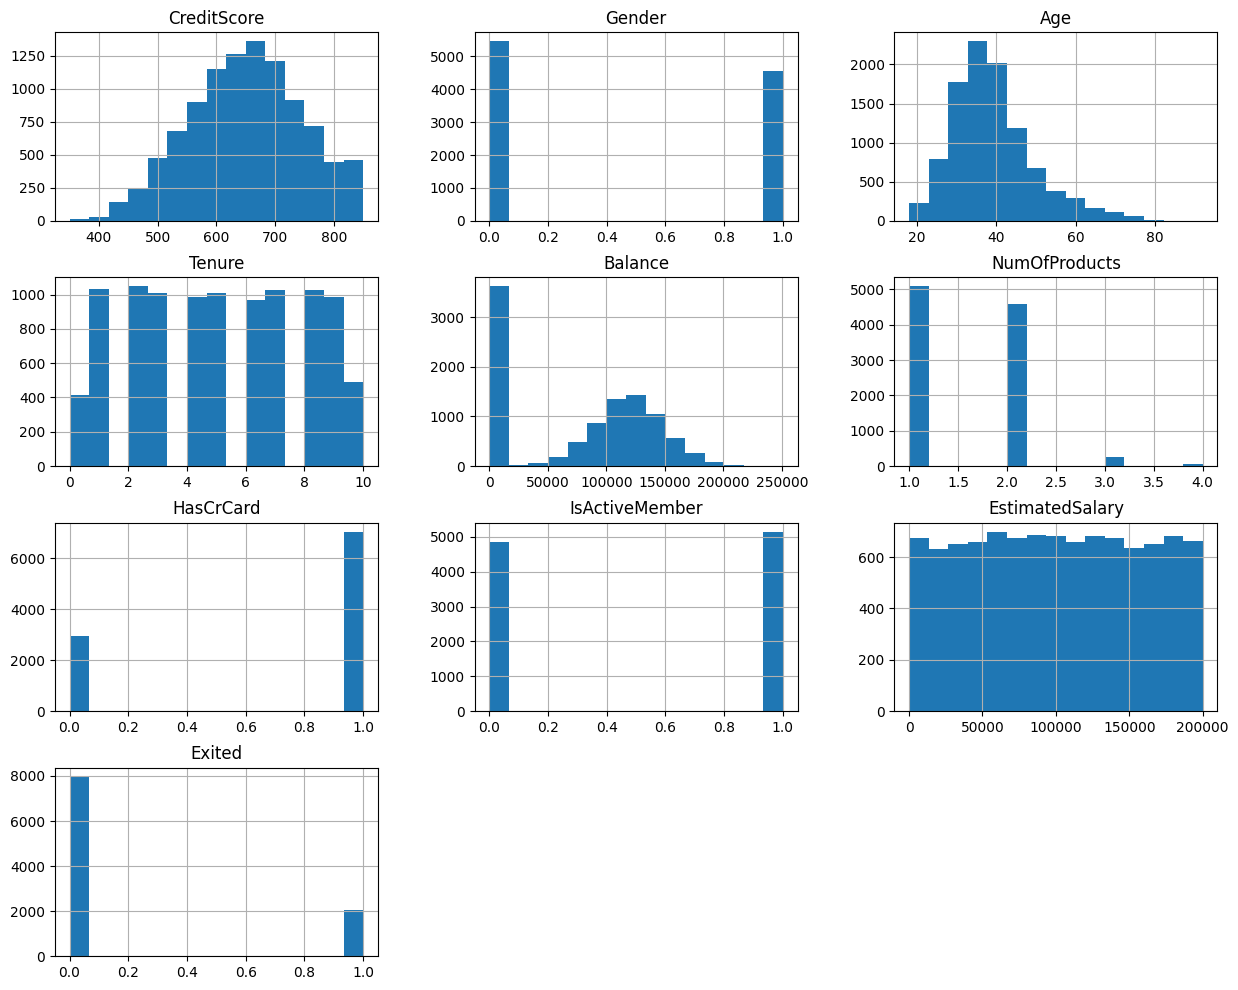

In [27]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()


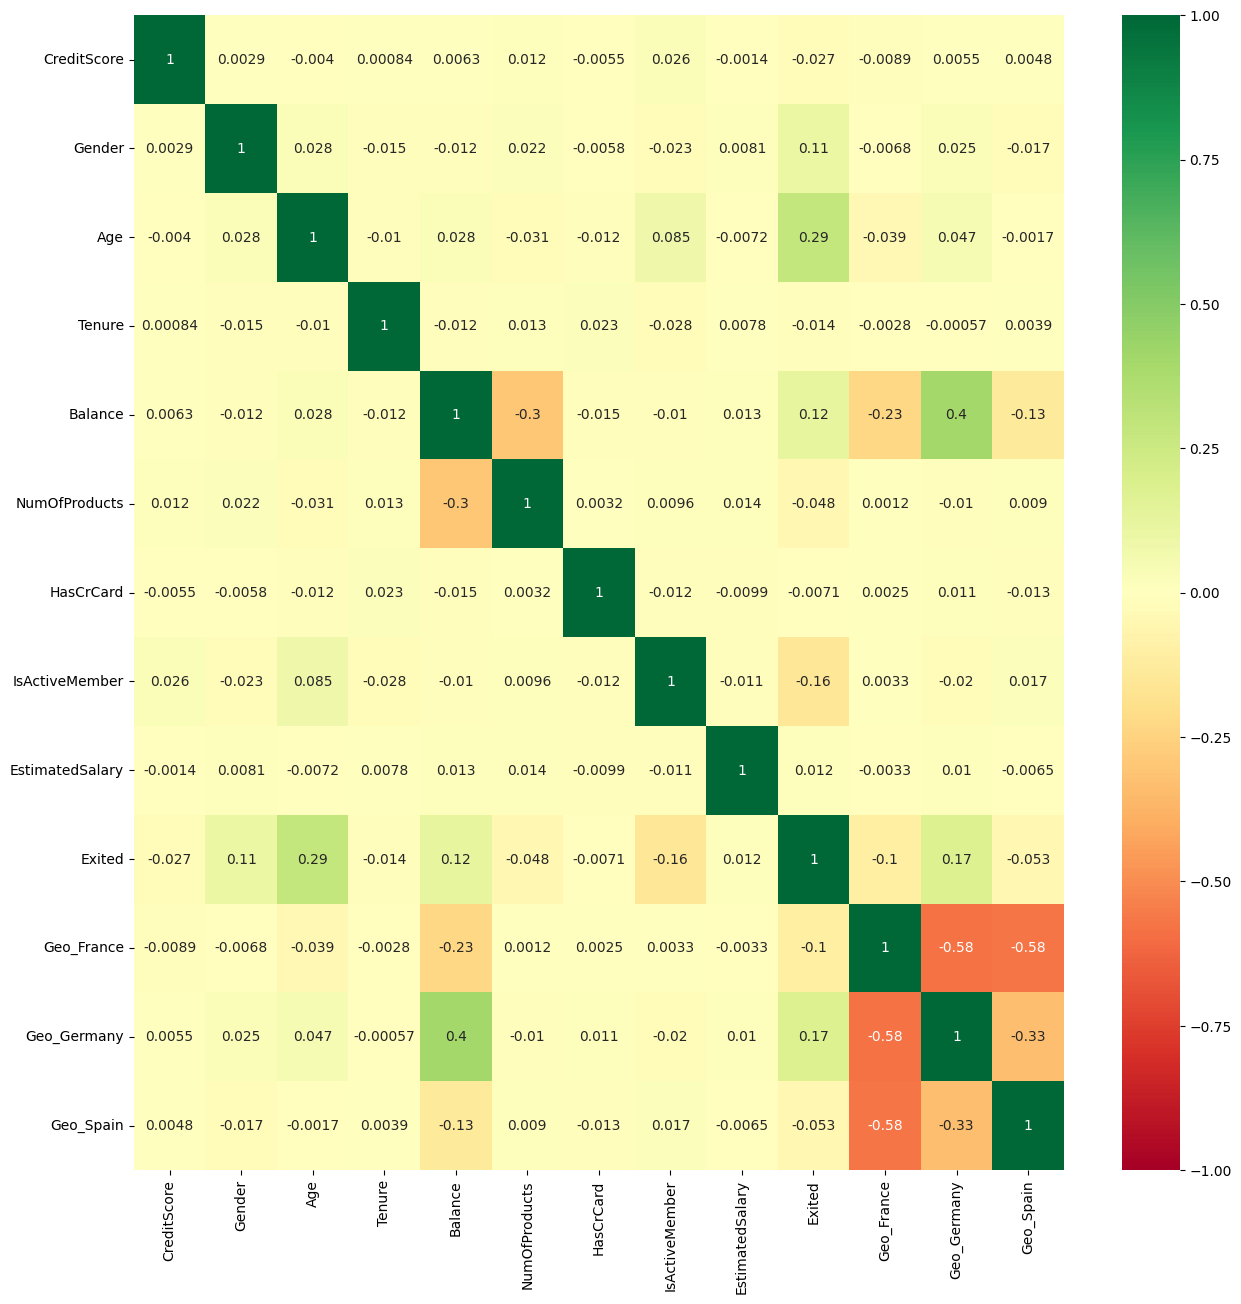

In [28]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0, vmax=1.0, vmin=-1.0)


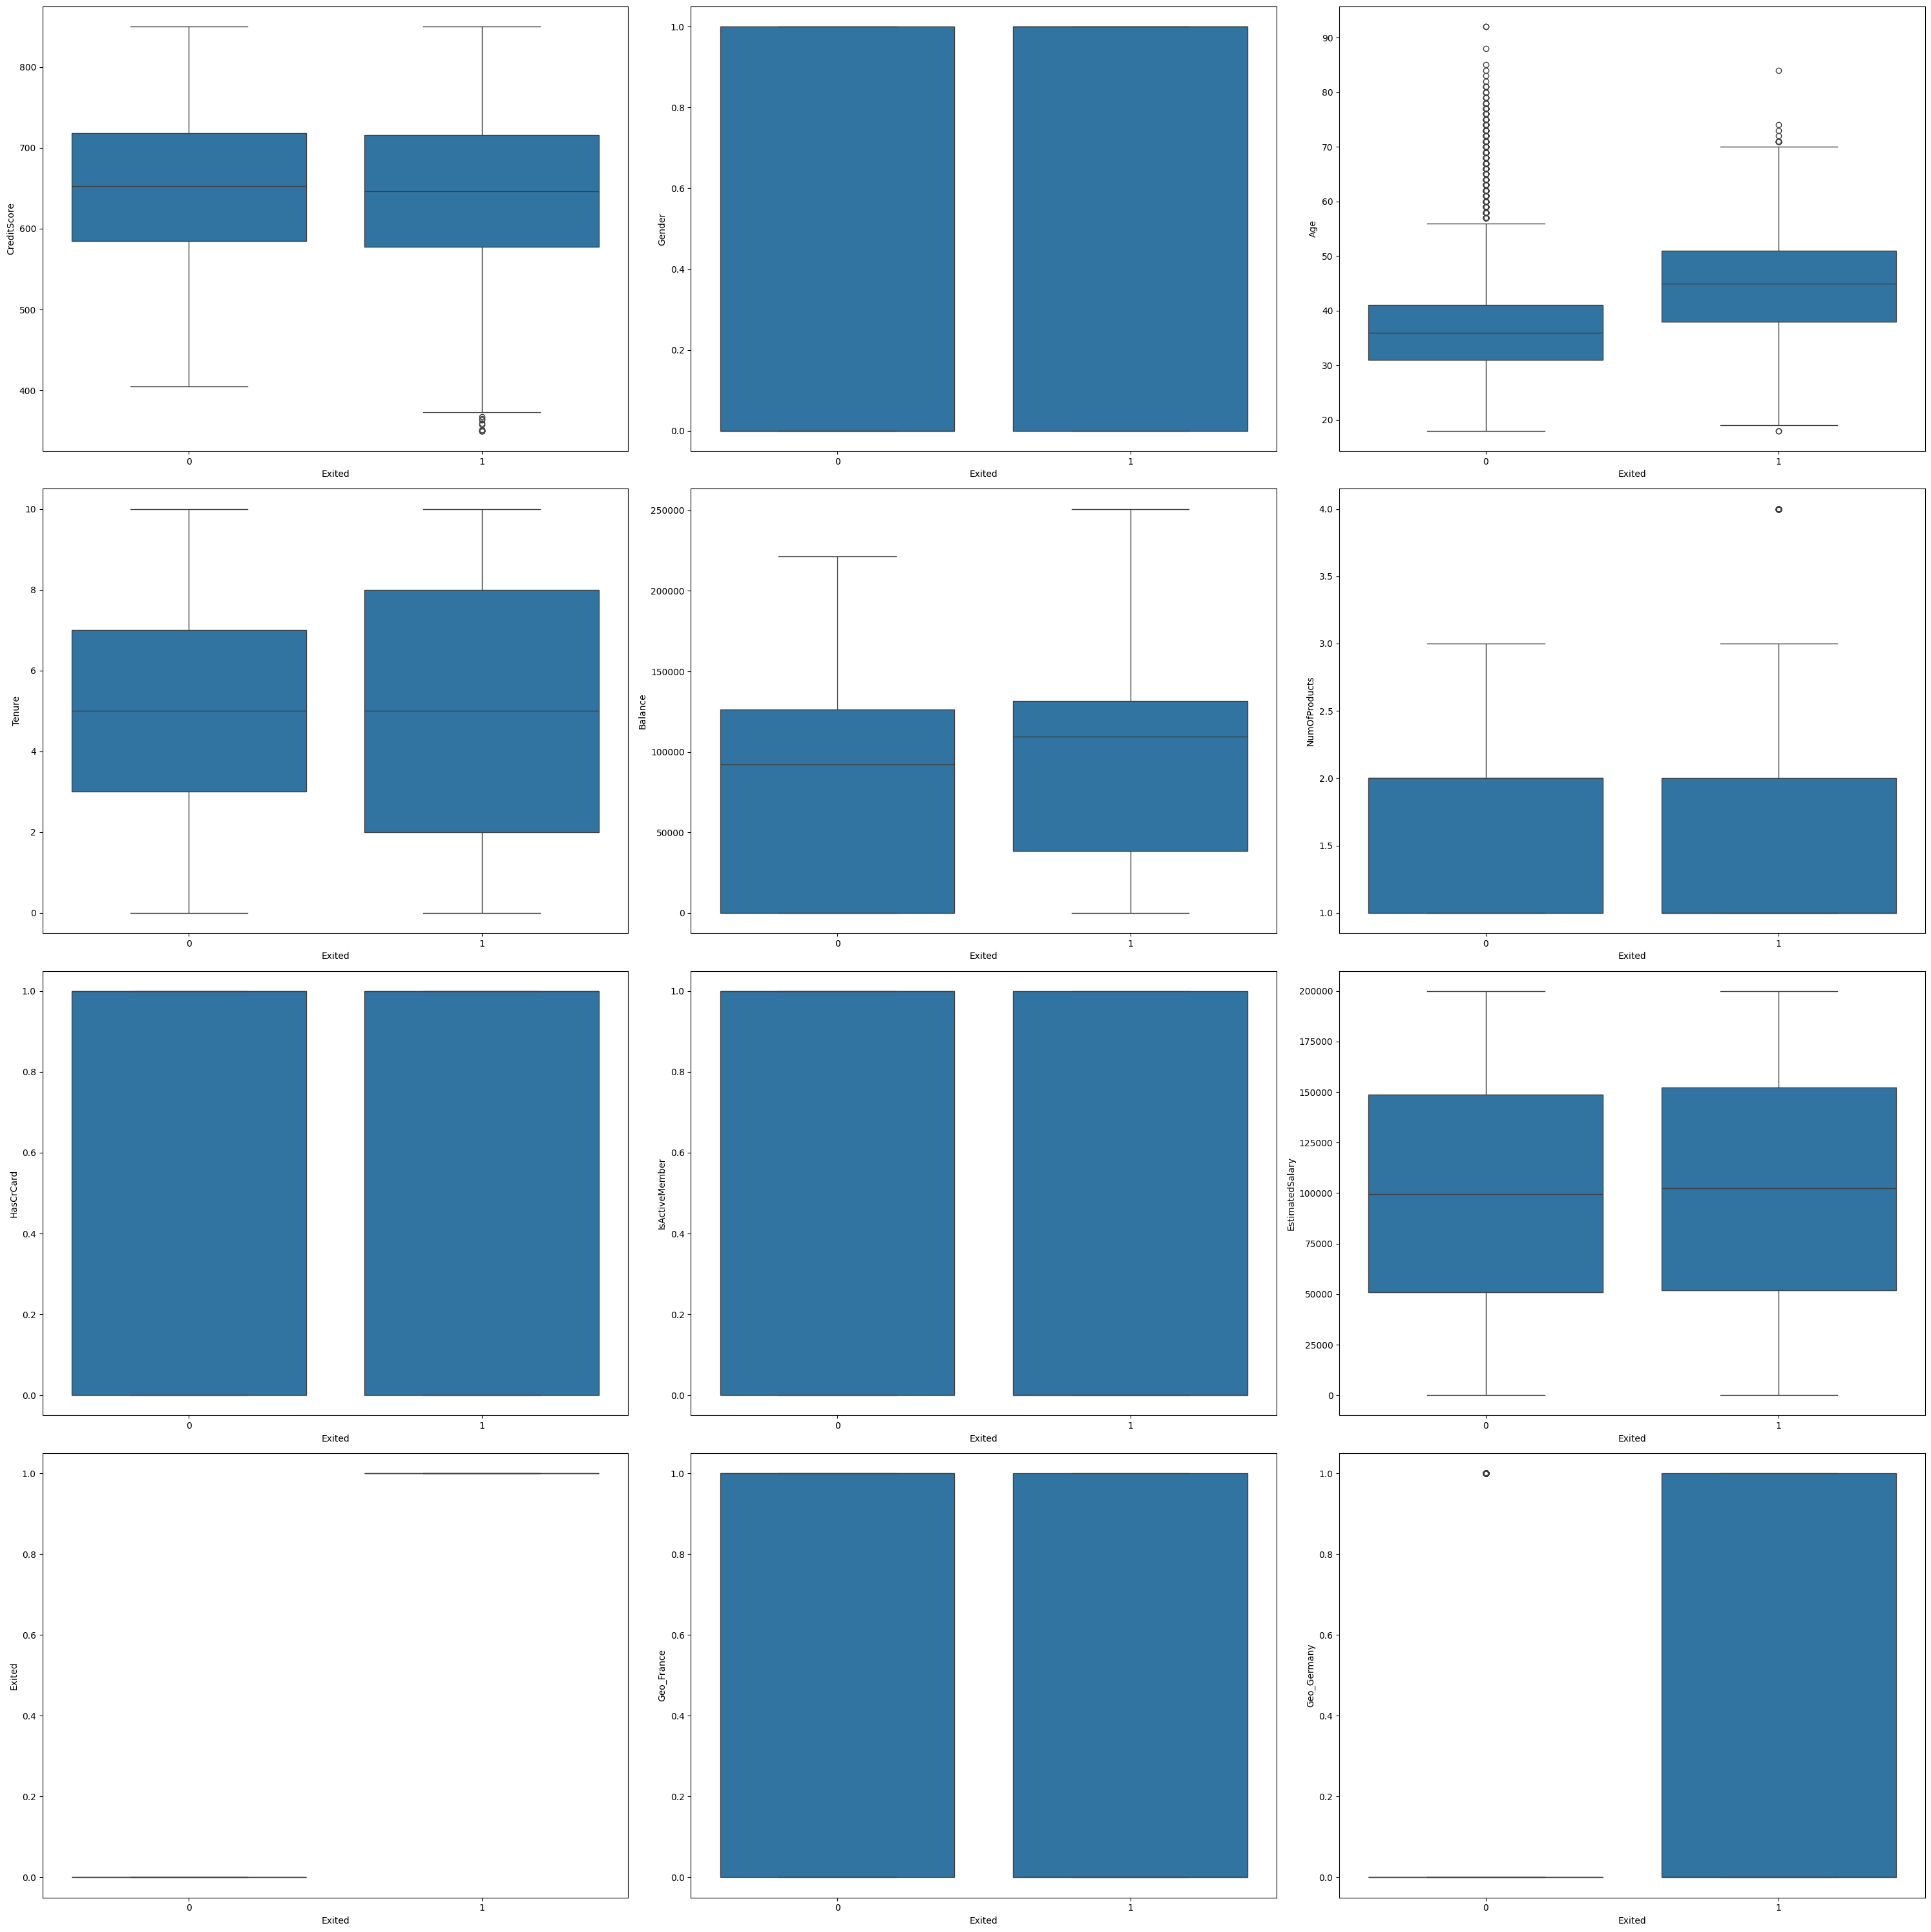

In [29]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col> 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Exited'], y = df[df.columns[i]],ax = axes)
    col+= 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [30]:
y = df["Exited"]
X = df.drop("Exited", axis = 1)

In [31]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True
6,645,0,44,8,113755.78,2,1,0,149756.71,False,False,True
7,822,0,50,7,0.00,2,1,1,10062.80,True,False,False
8,376,1,29,4,115046.74,4,1,0,119346.88,False,True,False
9,501,0,44,4,142051.07,2,0,1,74940.50,True,False,False


In [32]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [33]:
# Feature Scaling because yes we don't want one independent varaibale dominationg the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [35]:
# predicting the model
y_pred = classifier.predict(X_test)


In [36]:
# Checking Accuracy, confusion matrix and Classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2511  106]
 [ 529  154]]
0.8075757575757576
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2617
           1       0.59      0.23      0.33       683

    accuracy                           0.81      3300
   macro avg       0.71      0.59      0.61      3300
weighted avg       0.78      0.81      0.77      3300



# **Building ANN Model :**


In [38]:
# sequential model to initialse our ann and dense module to build the layers
model = Sequential()

# Adding the inpurt layer and the first hidden layer
model.add(Dense(units=100,
               kernel_initializer = 'uniform',
               activation = 'relu',
               input_dim = 12))
# Adding the second hidden layer
model.add(Dense(units=150,
               kernel_initializer = 'uniform',
               activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(units=200,
               kernel_initializer = 'uniform',
               activation = 'relu'))
# Adding the fourth hidden layer
model.add(Dense(units=400,
               kernel_initializer = 'uniform',
               activation = 'relu'))
# Adding the Outout and last  layer
model.add(Dense(units=1,
               kernel_initializer = 'uniform',
               activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,451 (497.86 KB)

 Trainable params: 127,451 (497.86 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Fitting the ANN to the Training set
EPOCH =    60
BATCH_SIZE = 64

# Train model
H = model.fit(X_train, y_train,
              epochs = EPOCH,
              batch_size = BATCH_SIZE,
              validation_split = 0.2,
              verbose = 1)

Epoch 1/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7754 - loss: 0.5503 - val_accuracy: 0.8000 - val_loss: 0.4291
Epoch 2/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8064 - loss: 0.4231 - val_accuracy: 0.8321 - val_loss: 0.4029
Epoch 3/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8397 - loss: 0.3971 - val_accuracy: 0.8522 - val_loss: 0.3635
Epoch 4/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.3541 - val_accuracy: 0.8649 - val_loss: 0.3487
Epoch 5/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3620 - val_accuracy: 0.8649 - val_loss: 0.3467
Epoch 6/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8672 - loss: 0.3256 - val_accuracy: 0.8657 - val_loss: 0.3436
Epoch 7/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8676 - loss: 0.3275 - val_accuracy: 0.8672 - val_loss: 0.3414
Epoch 8/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8713 - loss: 0.3258 - val_accuracy: 0.8604 - val_loss

In [42]:
H.history

{'accuracy': [0.7906716465950012,
  0.8102611899375916,
  0.8492537140846252,
  0.8539178967475891,
  0.8611940145492554,
  0.8610074520111084,
  0.8634328246116638,
  0.8654850721359253,
  0.8656716346740723,
  0.871082067489624,
  0.8662313222885132,
  0.8722015023231506,
  0.8686566948890686,
  0.8688432574272156,
  0.874813437461853,
  0.8742537498474121,
  0.8720149397850037,
  0.8742537498474121,
  0.8807835578918457,
  0.8794776201248169,
  0.8826492428779602,
  0.8813433051109314,
  0.8858209252357483,
  0.8832089304924011,
  0.8895522356033325,
  0.8921641707420349,
  0.891791045665741,
  0.89552241563797,
  0.8953357934951782,
  0.8957089781761169,
  0.8968283534049988,
  0.8988806009292603,
  0.8996268510818481,
  0.9050372838973999,
  0.9089552164077759,
  0.904664158821106,
  0.9076492786407471,
  0.9139925241470337,
  0.9113805890083313,
  0.9113805890083313,
  0.9149253964424133,
  0.91697758436203,
  0.9218283295631409,
  0.9287313222885132,
  0.9276119470596313,
  0.92

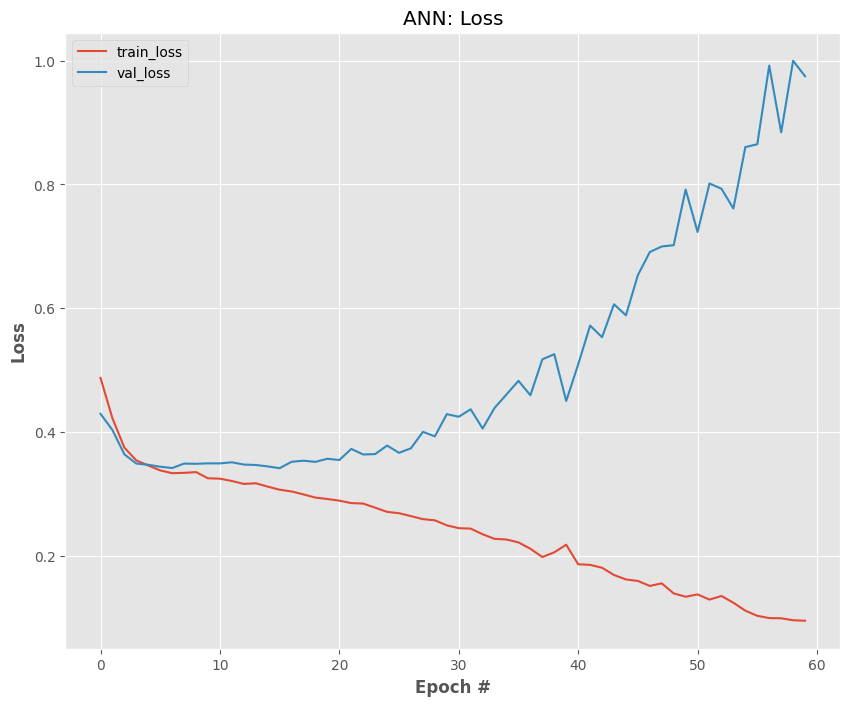

In [44]:
# plot the training and validation loss
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

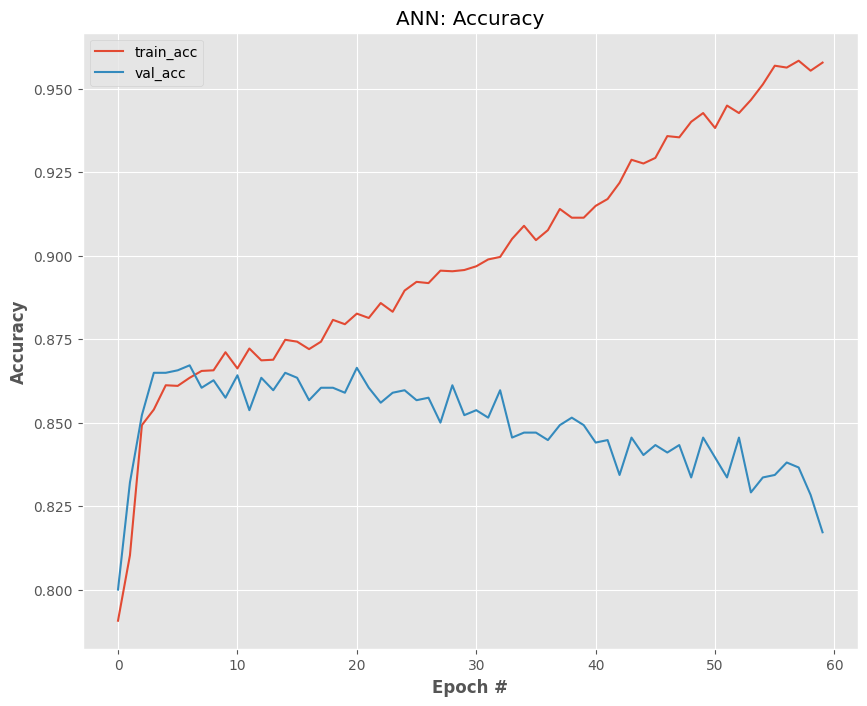

In [45]:
# plot the training and validation accuracy
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[2206  411]
 [ 280  403]]
0.7906060606060606
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2617
           1       0.50      0.59      0.54       683

    accuracy                           0.79      3300
   macro avg       0.69      0.72      0.70      3300
weighted avg       0.81      0.79      0.80      3300



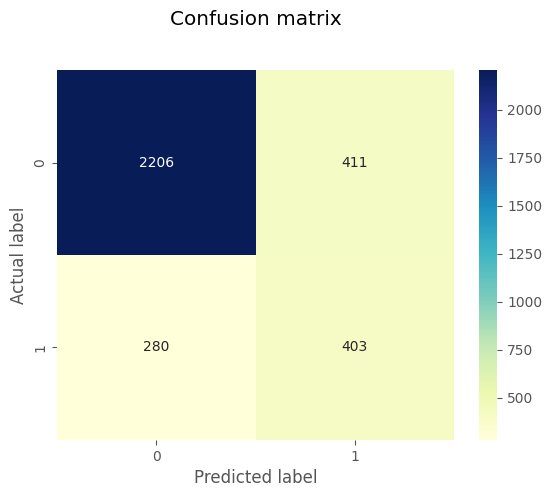

In [50]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title("Confusion matrix", y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
